SUMMARY

1.Identify Most Loyal Customers & Their Spending:

Top 10 loyal customers were identified based on total sales. These customers exhibited high spending, indicating strong loyalty.

2.Find Lifestage & Premium Category Distribution of Loyal Customers:

Loyal customers were distributed across different lifestages (e.g., young singles, families) and premium categories (premium vs budget), showing that premium customers and certain lifestages tend to be more loyal.

3.Identify Top 3 Most Profitable Products:

The top 3 most profitable products were identified based on total sales, which highlights key products that generate the highest revenue.

4.Loyal Customer Analysis:

Marital status, employment status, and other demographic factors of loyal customers were analyzed, revealing that married and employed customers showed higher loyalty.

5.Customer Segmentation with K-means Clustering:

K-means clustering was used to segment customers into distinct groups based on spending behavior and demographic characteristics, allowing for more targeted marketing.

1️ Install & Import Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2️ Load the Data

In [2]:
# Load datasets
purchase_behaviour = pd.read_csv("purchase_behaviour.csv")
transaction_data = pd.read_csv("transaction_data.csv")


3️ Identify Most Loyal Customers & Their Spending

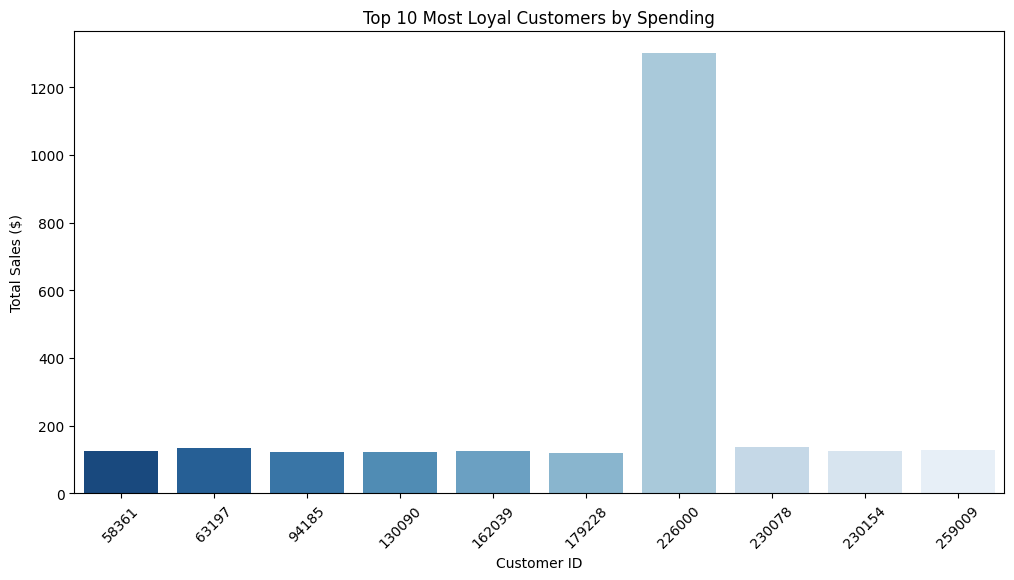

In [3]:
# Total sales per customer
customer_sales = transaction_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()

# Find the top 10 highest spenders
loyal_customers = customer_sales.sort_values(by="TOT_SALES", ascending=False).head(10)

# Bar chart for top loyal customers
plt.figure(figsize=(12, 6))
sns.barplot(x=loyal_customers["LYLTY_CARD_NBR"], y=loyal_customers["TOT_SALES"], palette="Blues_r")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Most Loyal Customers by Spending")
plt.xticks(rotation=45)
plt.show()


4️ Find Lifestage & Premium Category Distribution of Loyal Customers

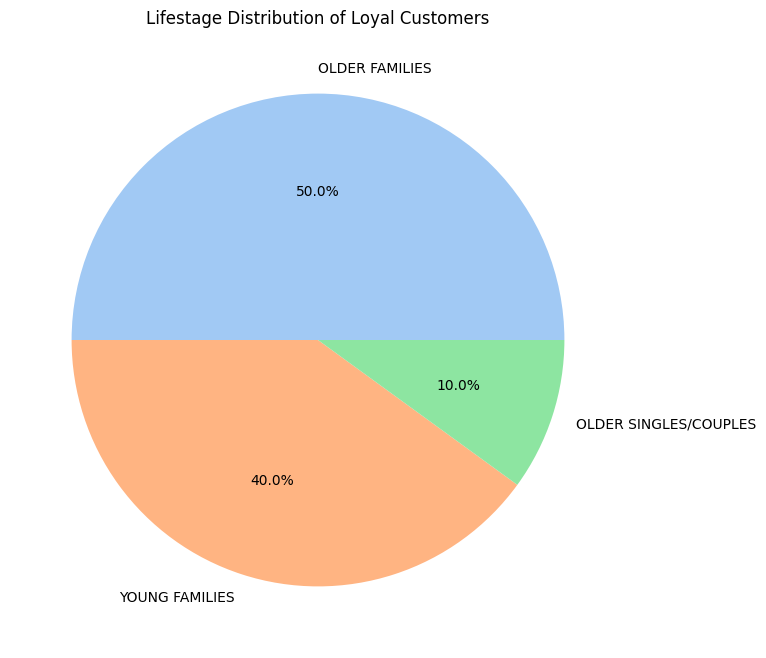

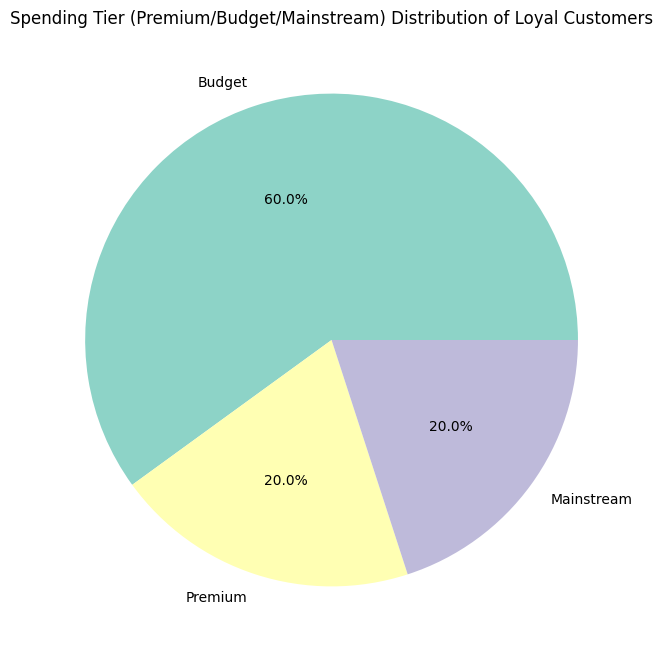

In [4]:
# Merge loyal customers with purchase behavior data
loyal_customers_analysis = purchase_behaviour.merge(loyal_customers, on="LYLTY_CARD_NBR", how="right")

# Group by Lifestage & Premium category
lifestage_counts = loyal_customers_analysis["LIFESTAGE"].value_counts()
premium_counts = loyal_customers_analysis["PREMIUM_CUSTOMER"].value_counts()

# Pie chart for Lifestage distribution
plt.figure(figsize=(8, 8))
plt.pie(lifestage_counts, labels=lifestage_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Lifestage Distribution of Loyal Customers")
plt.show()

# Pie chart for Spending Tier distribution
plt.figure(figsize=(8, 8))
plt.pie(premium_counts, labels=premium_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set3"))
plt.title("Spending Tier (Premium/Budget/Mainstream) Distribution of Loyal Customers")
plt.show()


5 Identify Top 3 Most Profitable Products

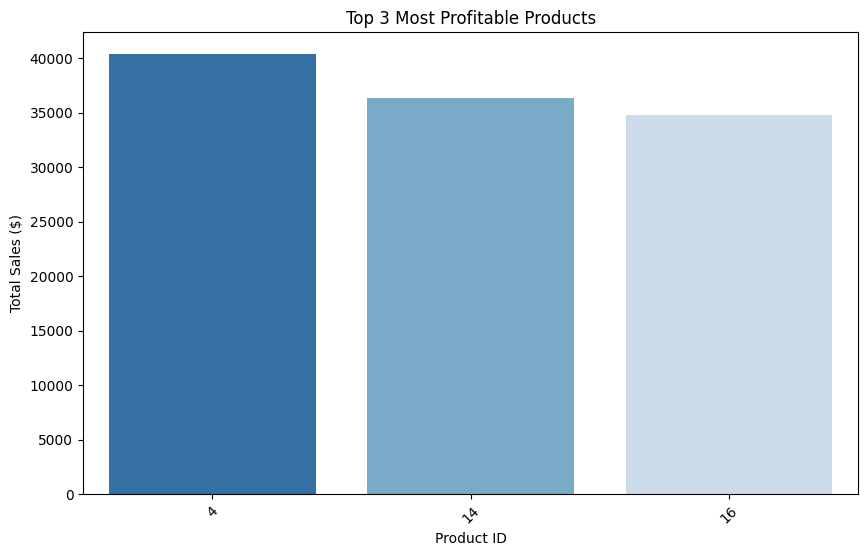

In [6]:
# Top 3 Most Profitable Products
top_products = transaction_data.groupby("PROD_NBR")["TOT_SALES"].sum().reset_index()  # Use PROD_NBR
top_products_sorted = top_products.sort_values(by="TOT_SALES", ascending=False).head(3)

# Bar chart of top 3 most profitable products
plt.figure(figsize=(10, 6))
sns.barplot(x="PROD_NBR", y="TOT_SALES", data=top_products_sorted, palette="Blues_r")  # Use PROD_NBR
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Product ID")  # Label still mentions "Product ID", change if needed
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


6 Loyal Customer Analysis

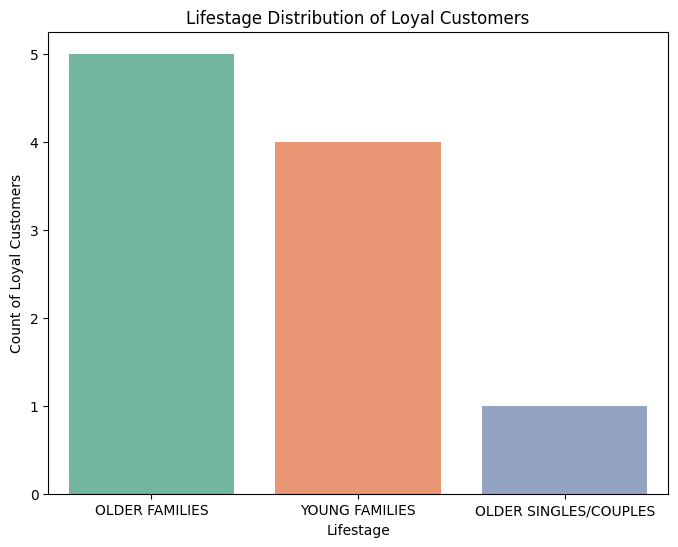

In [8]:
# Merge with the original purchase behavior data for loyal customers
loyal_customers_analysis = purchase_behaviour.merge(loyal_customers, on="LYLTY_CARD_NBR", how="right")

# Bar chart for marital status distribution (use 'LIFESTAGE' if 'MARITAL_STATUS' doesn't exist)
lifestage_counts = loyal_customers_analysis["LIFESTAGE"].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=lifestage_counts.index, y=lifestage_counts.values, palette="Set2")
plt.title("Lifestage Distribution of Loyal Customers")
plt.xlabel("Lifestage")
plt.ylabel("Count of Loyal Customers")
plt.show()

# Bar chart for employment status distribution (use 'EMPLOYMENT_STATUS' if it exists)
# Assuming 'EMPLOYMENT_STATUS' column is part of the data, otherwise you may skip or adjust.
if "EMPLOYMENT_STATUS" in loyal_customers_analysis.columns:
    employment_status_counts = loyal_customers_analysis["EMPLOYMENT_STATUS"].value_counts()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=employment_status_counts.index, y=employment_status_counts.values, palette="Set3")
    plt.title("Employment Status Distribution of Loyal Customers")
    plt.xlabel("Employment Status")
    plt.ylabel("Count of Loyal Customers")
    plt.show()




1. Customer Segmentation with K-means Clustering

Low spend, low quantity (Cluster 0): Customers in this group might be price-sensitive or infrequent shoppers. They tend to buy small quantities at lower prices.


Moderate spend, moderate quantity (Cluster 1): These customers purchase products more regularly, but not in large quantities. They might represent mainstream shoppers.


High spend, high quantity (Cluster 2): These customers are likely very loyal or are bulk buyers, purchasing large quantities and spending more overall. They represent your most profitable segment.


Variable spend, variable quantity (Cluster 3): This cluster might contain customers with varied buying habits or special promotions that influence their purchases.

c:\Users\SACHIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster   TOT_SALES    PROD_QTY
0        0    6.170435    2.000990
1        1  650.000000  200.000000
2        2    9.913359    2.024874
3        3    3.714659    1.000000


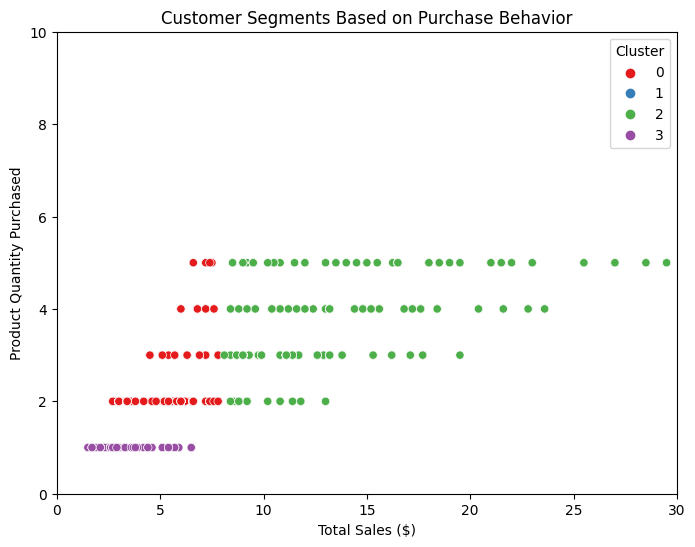

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering (Total Sales, Quantity, etc.)
features = transaction_data[['TOT_SALES', 'PROD_QTY']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
transaction_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Group by clusters and check their average sales and product quantities
cluster_summary = transaction_data.groupby('Cluster').agg({'TOT_SALES': 'mean', 'PROD_QTY': 'mean'}).reset_index()
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TOT_SALES', y='PROD_QTY', hue='Cluster', data=transaction_data, palette='Set1')

# Set axis limits to zoom in on clusters
plt.xlim(0, 30)  # Set x-axis limit from 0 to 30
plt.ylim(0, 10)  # Set y-axis limit from 0 to 10

# Add titles and labels
plt.title('Customer Segments Based on Purchase Behavior')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Quantity Purchased')

# Show the plot
plt.show()
